In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [25]:
# ▶ 데이터 생성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.DataFrame([1, 5, 9, 10, 15, 20, 34])
test

,0
0,1
1,5
2,9
3,10
4,15
5,20
6,34


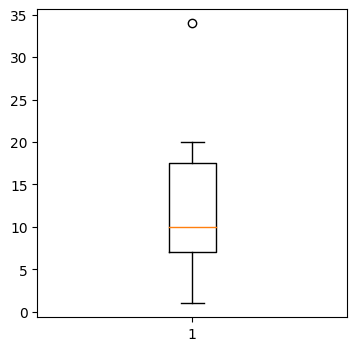

In [26]:
# ▶ Box plot 그려보기
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
a = list(test[0])
box = ax.boxplot(a)

In [29]:
# ▶ 데이터 생성
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

Text(0, 0.5, 'Value')

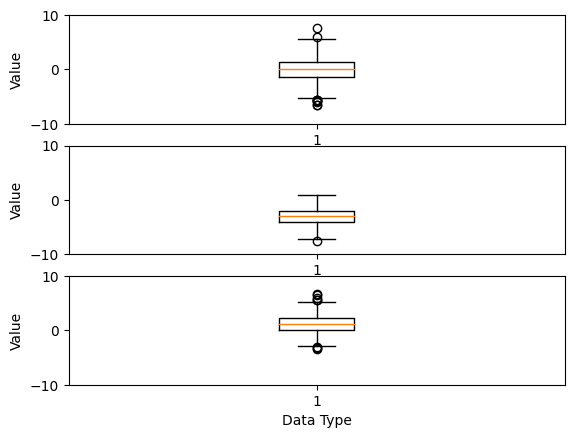

In [36]:
# ▶ Box plot 그려보기

fig, ax = plt.subplots()

labels = ['data_a', 'data_b', 'data_c']

box = ax.boxplot([data_a, data_b, data_c], whis = 1.5)
ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

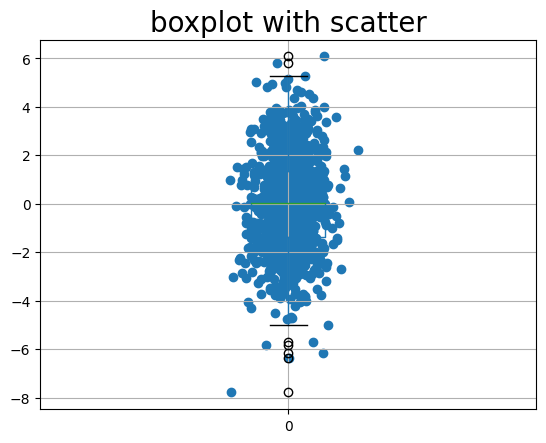

In [24]:
# ▶ Box plot, 분포를 확인하기 어려울 때 다음 Plot을 활용함 
data_a_df = pd.DataFrame(data_a)
data_a_df.boxplot()
 
# ▶ matplotlib을 이용하여 그 위에 각 점들을 찍어줌
for i, d in enumerate(data_a_df):
    y = data_a_df[d]
    x = np.random.normal(i + 1, 0.04, len(y))
    plt.scatter(x, y)
plt.title("boxplot with scatter", fontsize=20)    
plt.show()

In [40]:
for key, value in box.items():
    print(key, value)

whiskers [<matplotlib.lines.Line2D object at 0x7f92fb496d70>, <matplotlib.lines.Line2D object at 0x7f92fb497010>]
caps [<matplotlib.lines.Line2D object at 0x7f92fb4972b0>, <matplotlib.lines.Line2D object at 0x7f92fb497550>]
boxes [<matplotlib.lines.Line2D object at 0x7f92fb496ad0>]
medians [<matplotlib.lines.Line2D object at 0x7f92fb4977f0>]
fliers [<matplotlib.lines.Line2D object at 0x7f92fb497a90>]
means []


In [20]:
# ▶ Outlier 검출하기
def get_box_plot_data(labels, bp):
    rows_list = []
    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        dict1['Outlier'] = bp['fliers'][i].get_ydata()
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

In [21]:
# ▶ Box plot summary
get_box_plot_data(labels, box)

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker,Outlier
0,data_a,-5.022137,-1.389243,0.015208,1.359398,5.276149,"[-6.348084065451197, -6.16220267457209, -7.791..."
1,data_b,-6.967830,-3.920965,-3.032291,-1.860128,0.867166,"[-7.3915645416472, 1.7166538296979281, 2.89466..."
2,data_c,-2.625450,0.208807,1.149919,2.124717,4.998582,"[-2.8487274034199936, -3.8000232034992587, -2...."


In [22]:
# ▶ Box plot Outlier 객체 출력
fliers = [item.get_ydata() for item in box['fliers']]
fliers

[array([-6.34808407, -6.16220267, -7.7912739 , -5.81082599, -5.71278982,
         5.7962262 ,  6.07916096]),
 array([-7.39156454,  1.71665383,  2.89466911,  1.40436495,  2.11851371]),
 array([-2.8487274 , -3.8000232 , -2.83251533, -2.9743109 , -3.04629726,
        -2.85437761, -2.85789601,  5.8501608 ,  5.20412696,  6.45346828,
         5.19952901,  5.32377221,  5.0691568 ])]

In [23]:
fliers[1]

array([-7.39156454,  1.71665383,  2.89466911,  1.40436495,  2.11851371])